In [23]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


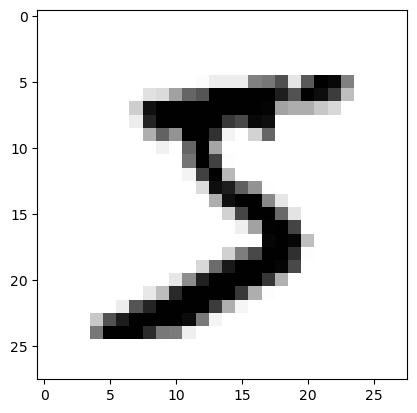

In [3]:
plt.imshow(x_train[0], cmap = 'gray_r')
plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255

In [7]:
scaled_train.shape

(60000, 28, 28, 1)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
scaled_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 합성곱 신경망 모델 구성

In [10]:
model = keras.Sequential()

In [13]:
# 합성곱 층 추가 
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same',
                              input_shape = (28, 28, 1)))

C:\Users\ITSC\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
# 풀링층 추가 
model.add(keras.layers.MaxPool2D(2))

In [15]:
# 두번째 합성곱 - 풀링층 추가 
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPool2D(2))

In [16]:
# 3차원 특성맵을 일렬로 펼침
model.add(keras.layers.Flatten())

In [18]:
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))

In [19]:
# 출력층 
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [20]:
# 모델구조확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련 

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-cnn-model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights= True)

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
# 검증 데이터 분할
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train,y_train, test_size = 0.2, stratify = y_train, random_state= 12)

In [25]:
history = model.fit(x_sub, y_sub, epochs = 20,validation_data= (x_val, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8551 - loss: 0.4573 - val_accuracy: 0.9836 - val_loss: 0.0557
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9751 - loss: 0.0828 - val_accuracy: 0.9861 - val_loss: 0.0454
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9828 - loss: 0.0596 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9848 - loss: 0.0502 - val_accuracy: 0.9891 - val_loss: 0.0358
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9888 - loss: 0.0386 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9895 - loss: 0.0326 - val_accuracy: 0.9898 - val_loss: 0.0368
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9898 - loss: 0.0301 - val_accuracy: 0.9911 - val_loss: 0.0300
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9925 -

# 훈련 로그 확인 

In [26]:
history.history

{'accuracy': [0.932895839214325,
  0.9760624766349792,
  0.9817291498184204,
  0.984291672706604,
  0.987333357334137,
  0.989020824432373,
  0.9903333187103271,
  0.992104172706604,
  0.992479145526886,
  0.9931458234786987,
  0.9934791922569275],
 'loss': [0.22210849821567535,
  0.08112487941980362,
  0.06074347347021103,
  0.0511687770485878,
  0.04099789261817932,
  0.0342407301068306,
  0.02966301701962948,
  0.024876665323972702,
  0.023959670215845108,
  0.021139057353138924,
  0.0186492707580328],
 'val_accuracy': [0.9835833311080933,
  0.9860833287239075,
  0.9879999756813049,
  0.9890833497047424,
  0.9886666536331177,
  0.9898333549499512,
  0.9910833239555359,
  0.9912499785423279,
  0.9902499914169312,
  0.9911666512489319,
  0.9890000224113464],
 'val_loss': [0.055731307715177536,
  0.0454445406794548,
  0.03837379813194275,
  0.03577287122607231,
  0.03923841193318367,
  0.036759406328201294,
  0.029959268867969513,
  0.03561609610915184,
  0.03686371445655823,
  0.03879

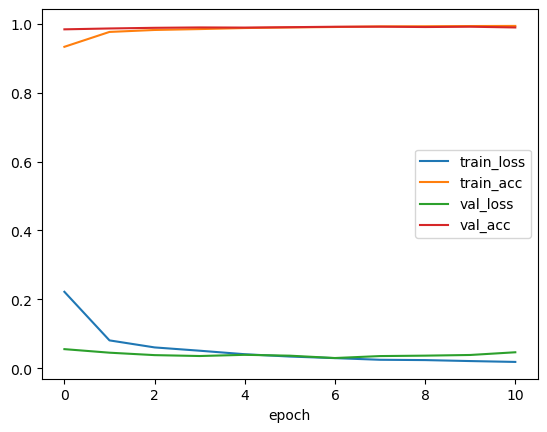

In [28]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

In [29]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255 # 나누기는 스케일링 

In [30]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0333


[0.026289358735084534, 0.9919999837875366]

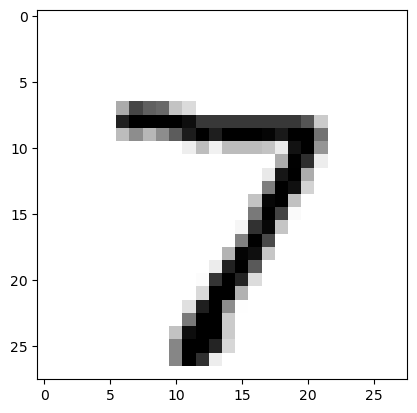

In [31]:
# 데이터 시각화 
plt.imshow(scaled_test[0].reshape(28, 28), cmap = 'gray_r') # 시각화 할 때는 28로 reshape
plt.show()

In [32]:
y_test[0]

7